# Spectral Distribution Tests (SD-Tests)
# Different candidates for different target functions?
## luxpy together with emipr19nrm02

- management of target functions to work with luxpy (SMCF, f1prime, etc.)
- work with additional collections of responsivities

For our next more general work (extension to other target functions) we need
- All target functions integrated into the luxpy CMF **(done for BLH, $s_{\mathrm{mel}}$, V')**
- Extended sets of detector responsivities for the calculation **(done in a very first step)**
- A wide collection of SD to work with **(done for PT and Mono LEDs)**
- calculate some statistics for the characteristic values and their relation to SMCF and statistical quality parameters **(ToDo)**

In [14]:
from scipy import rand

# temp import only
from empir19nrm02.tools.help import strd, label_font_size, plot_cmf2, save_fig, get_target, label_management, \
    quantil, display_responsivity

#%run -i jhelp


import luxpy as lx
import numpy as np
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression

from empir19nrm02.f1prime import py_f1PrimeGlx
from empir19nrm02.tools import plotCorrMatrixSmall
%matplotlib inline
from luxpy import _CMF, plot_spectrum_colors
from luxpy.color.utils import plot_cmfs, plot_color_data
from luxpy.toolboxes.photbiochem import _BLH, Km_correction_factor
from luxpy.toolboxes.photbiochem import _ACTIONSPECTRA_CIES026
from luxpy.toolboxes.indvcmf import add_to_cmf_dict
from luxpy.spectrum import spd_to_xyz

from empir19nrm02 import _SPD, _RES
from empir19nrm02.tools.help import display_color_diagram, display_spectra

print('Version of luxpy:', lx.__version__)
out_dir = 'SPD_Test'

import os
print( 'CWD:', os.getcwd())


Version of luxpy: v1.10.0
CWD: E:\TTBV\Python\empir19nrm02\empir19nrm02\Jupyter
Version of luxpy: v1.10.0
CWD: E:\TTBV\Python\empir19nrm02\empir19nrm02\Jupyter


# What about other target functions?

**$V^{'}(\lambda)$** is already included in the CMF list (cieobs='1951_20_scotopic')

To add:
- **BLH** (from the photobiochem toolbox of luxpy to the _CMF)
- **$s_{\mathrm{mel}}$** (from the photobiochem toolbox ipRGC to the _CMF)

BLH


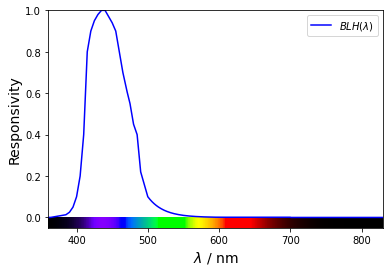

SMEL


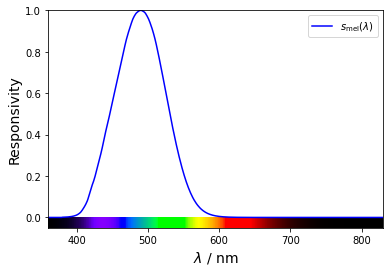

In [15]:
if 'BLH'  not in _CMF['types']:
    print( 'BLH')
    add_to_cmf_dict(bar=np.vstack((_BLH,_BLH[1],_BLH[1])), cieobs = 'BLH', K = 683, M = np.eye(3))
    plot_cmf2( name='BLH', cmf_symbols=['BLH'], cmf_colors = ['b-'],  single=True)
    save_fig( out_dir, 'BLH_function')

if 'SMEL'  not in _CMF['types']:
    print( 'SMEL')
    add_to_cmf_dict(bar=np.vstack((_ACTIONSPECTRA_CIES026[0],_ACTIONSPECTRA_CIES026[5],_ACTIONSPECTRA_CIES026[5],_ACTIONSPECTRA_CIES026[5])), cieobs = 'SMEL', K = 683*Km_correction_factor, M = np.eye(3))
    plot_cmf2( name='SMEL', cmf_symbols=['s_{\mathrm{mel}}'], cmf_colors = ['b-'],  single=True)
    save_fig( out_dir, 'SMEL_function')


# Plot all target functions

BTW: The other build in CMF (X,Y,Z) for different observers are also available

#### Remember: The first detector in every detector collection is the ideal detector.

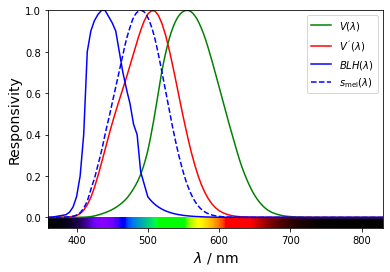

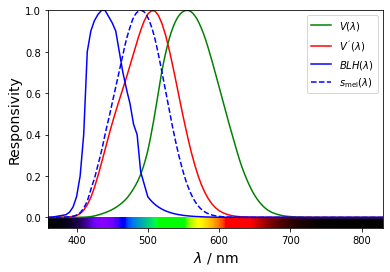

In [16]:
ax = plot_cmf2( name='1931_2', cmf_symbols=['V'], cmf_colors = ['g-'],  single=True)
plot_cmf2( ax=ax, name='1951_20_scotopic', cmf_symbols=['V^{´}'], cmf_colors = ['r-'],  single=True)
plot_cmf2( ax=ax, name='BLH', cmf_symbols=['BLH'], cmf_colors = ['b-'],  single=True)
plot_cmf2( ax=ax, name='SMEL', cmf_symbols=[strd['smel_e']], cmf_colors = ['b--'],  single=True)
save_fig( out_dir, 'target_all')

## Show the responsivities of new collections for color detectors (x,y and z) separately

* X,Y and Z Detectors

XDetectors


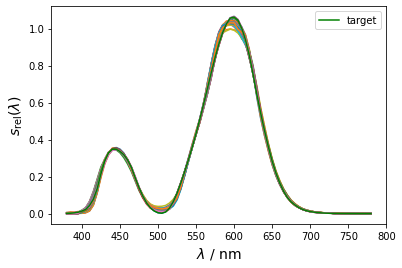

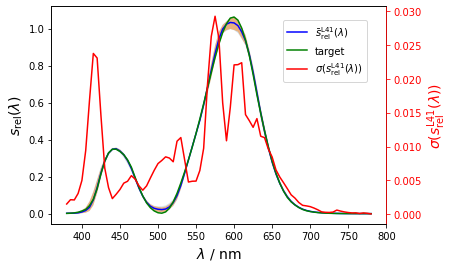

[4.0279e-07 4.6475e-02 3.6214e-02 3.8050e-02 3.7328e-02 3.9067e-02
 3.9621e-02 4.1052e-02 5.0117e-02 3.9913e-02 3.0391e-02 3.3855e-02
 4.3979e-02 3.3693e-02 3.1888e-02 3.0635e-02 3.0851e-02 2.8535e-02
 3.1285e-02 3.3651e-02 3.1627e-02 3.0915e-02 1.1936e-02 1.0980e-02
 1.0880e-02 1.1019e-02 1.0613e-02]
XDetectors


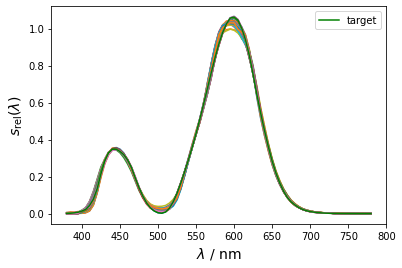

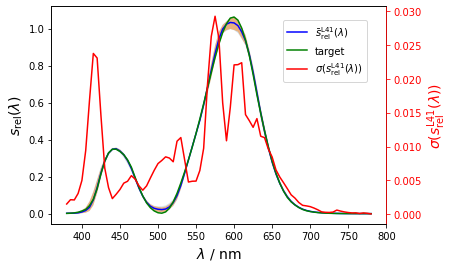

[4.0279e-07 4.6475e-02 3.6214e-02 3.8050e-02 3.7328e-02 3.9067e-02
 3.9621e-02 4.1052e-02 5.0117e-02 3.9913e-02 3.0391e-02 3.3855e-02
 4.3979e-02 3.3693e-02 3.1888e-02 3.0635e-02 3.0851e-02 2.8535e-02
 3.1285e-02 3.3651e-02 3.1627e-02 3.0915e-02 1.1936e-02 1.0980e-02
 1.0880e-02 1.1019e-02 1.0613e-02]


In [17]:
_name = 'XDetectors'
_detectors=_RES[_name]['S']['data'].copy()
XNorm, f1pX = display_responsivity(_name, _detectors, cieobs='1931_2', s_target_index=1, out_dir=out_dir)
collect = XNorm.T

YDetectors


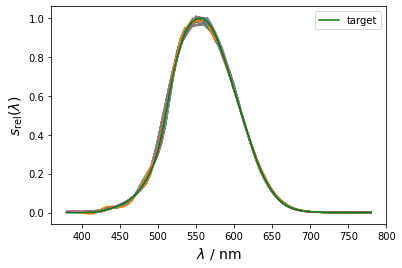

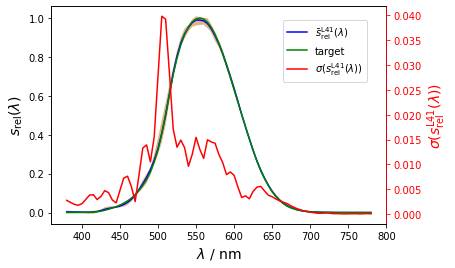

[0.0000e+00 3.2784e-02 2.2070e-02 2.1332e-02 2.1262e-02 2.5198e-02
 2.6587e-02 2.5145e-02 2.9574e-02 2.2676e-02 2.4612e-02 2.2251e-02
 3.6829e-02 3.3852e-02 3.1918e-02 3.0365e-02 3.1313e-02 3.1210e-02
 2.2501e-02 2.2689e-02 2.3784e-02 2.7327e-02 7.5231e-03 8.1952e-03
 7.4113e-03 8.3398e-03 7.9245e-03]
YDetectors


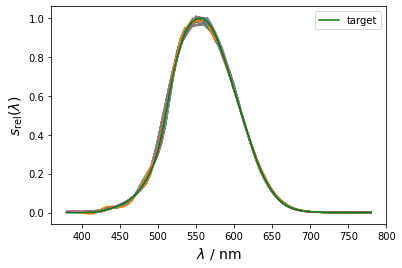

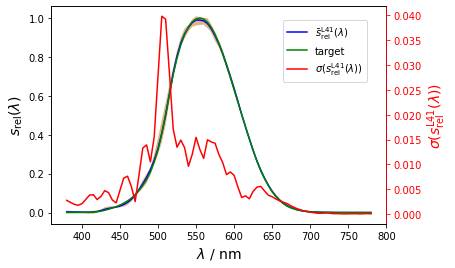

[0.0000e+00 3.2784e-02 2.2070e-02 2.1332e-02 2.1262e-02 2.5198e-02
 2.6587e-02 2.5145e-02 2.9574e-02 2.2676e-02 2.4612e-02 2.2251e-02
 3.6829e-02 3.3852e-02 3.1918e-02 3.0365e-02 3.1313e-02 3.1210e-02
 2.2501e-02 2.2689e-02 2.3784e-02 2.7327e-02 7.5231e-03 8.1952e-03
 7.4113e-03 8.3398e-03 7.9245e-03]


In [18]:
_name = 'YDetectors'
_detectors=_RES[_name]['S']['data'].copy()
YNorm, f1pY=display_responsivity(_name, _detectors, cieobs='1931_2', s_target_index=2, out_dir=out_dir)
collect = np.hstack((collect, YNorm[1:].T))

ZDetectors


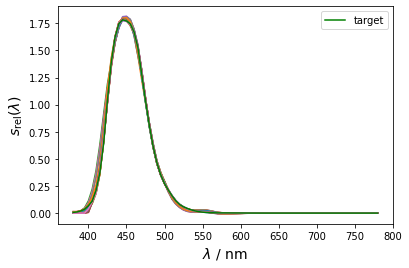

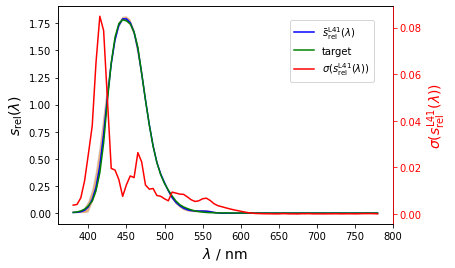

[2.4322e-12 2.7408e-02 2.4510e-02 2.4638e-02 2.7551e-02 2.1452e-02
 2.1966e-02 2.1445e-02 2.4163e-02 2.8351e-02 2.5515e-02 2.4951e-02
 7.0998e-02 6.0804e-02 6.1764e-02 5.5268e-02 5.6484e-02 5.4493e-02
 1.9811e-02 2.2649e-02 2.4050e-02 3.7207e-02 1.8671e-02 2.0420e-02
 1.9229e-02 2.1217e-02 1.7124e-02]
ZDetectors


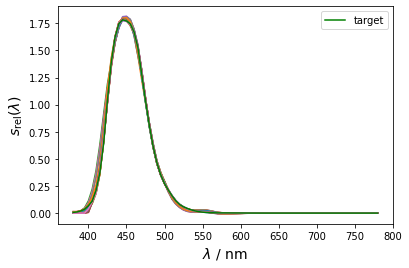

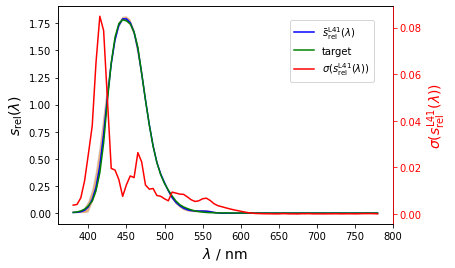

[2.4322e-12 2.7408e-02 2.4510e-02 2.4638e-02 2.7551e-02 2.1452e-02
 2.1966e-02 2.1445e-02 2.4163e-02 2.8351e-02 2.5515e-02 2.4951e-02
 7.0998e-02 6.0804e-02 6.1764e-02 5.5268e-02 5.6484e-02 5.4493e-02
 1.9811e-02 2.2649e-02 2.4050e-02 3.7207e-02 1.8671e-02 2.0420e-02
 1.9229e-02 2.1217e-02 1.7124e-02]


In [19]:
_name = 'ZDetectors'
_detectors=_RES[_name]['S']['data'].copy()
ZNorm, f1pZ = display_responsivity(_name, _detectors, cieobs='1931_2', s_target_index=3, out_dir=out_dir)
collect = np.hstack((collect, ZNorm[1:].T))

In [20]:
def out_names( f, detectorNumber):
    for i in range( detectorNumber):
        f.write('\"x%03d\";' %(i))
    for i in range( detectorNumber):
        f.write('\"y%03d\";' %(i))
    for i in range( detectorNumber):
        f.write('\"z%03d\";' %(i))
    f.write('\n')

f1pAll = np.hstack( (f1pX.T, f1pY.T,f1pZ.T))
#collect = np.vstack((f1pAll, collect))
filename = out_dir + '/' +  'ColorDetectors' + '.csv'
detectorNumber = _detectors.shape[0]-1
with open(filename, 'w') as f:
    f.write('\"Detector\";')
    out_names(f, detectorNumber)
    f.write('\"f1p\";')
    for i in range( 3*detectorNumber):
        f.write('%.4lf;' %(f1pAll[i]))
    f.write('\n')
    f.write('\"lambda\";')
    out_names(f, detectorNumber)
    np.savetxt(f, collect, delimiter=';')

# Other Detectors

* BLH
* VS
* SMEL(ipRGC)

#### Remember: The first detector in every detector collection is the ideal detector.


BLH


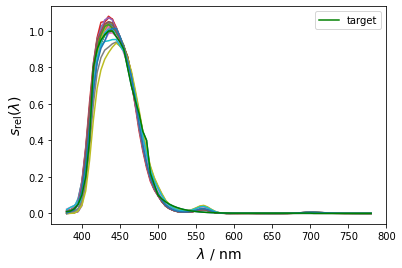

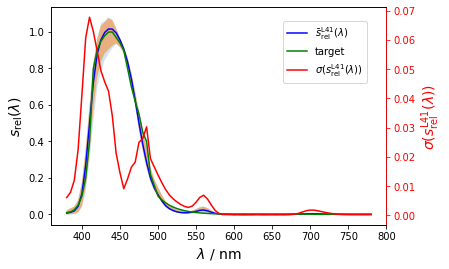

[8.9680e-03 8.5042e-02 8.2824e-02 8.7456e-02 1.1118e-01 1.0474e-01
 8.5512e-02 9.2104e-02 9.4175e-02 1.0753e-01 8.8273e-02 8.8304e-02
 8.2661e-02 1.2911e-01 1.0221e-01 9.5848e-02 9.1041e-02 9.9635e-02
 9.6961e-02 7.9685e-02 9.5421e-02 9.1934e-02 9.0015e-02 1.1263e-01
 1.1271e-01 9.9794e-02 6.4995e-02 1.0739e-01 1.4758e-01 7.7852e-02
 9.1710e-02]
BLH


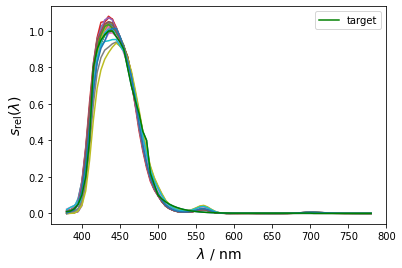

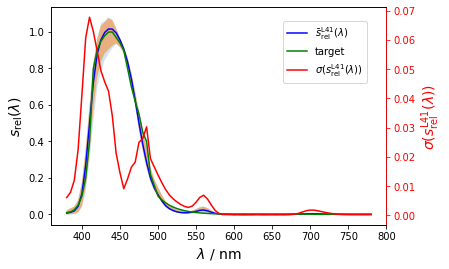

[8.9680e-03 8.5042e-02 8.2824e-02 8.7456e-02 1.1118e-01 1.0474e-01
 8.5512e-02 9.2104e-02 9.4175e-02 1.0753e-01 8.8273e-02 8.8304e-02
 8.2661e-02 1.2911e-01 1.0221e-01 9.5848e-02 9.1041e-02 9.9635e-02
 9.6961e-02 7.9685e-02 9.5421e-02 9.1934e-02 9.0015e-02 1.1263e-01
 1.1271e-01 9.9794e-02 6.4995e-02 1.0739e-01 1.4758e-01 7.7852e-02
 9.1710e-02]


In [21]:
_name = 'BLH'
_detectors=_RES[_name+'Detectors']['S']['data'].copy()
_ , _ = display_responsivity(_name, _detectors, cieobs=_name, out_dir=out_dir)

VS


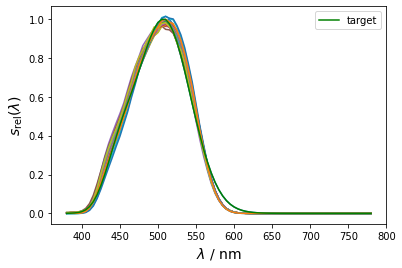

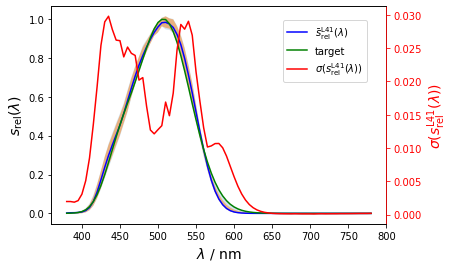

[7.9323e-11 6.6469e-02 6.4924e-02 7.0900e-02 9.6092e-02 8.8954e-02
 6.3658e-02 6.7268e-02 6.7839e-02 7.3677e-02 6.1266e-02 5.9708e-02
 6.2745e-02 6.1999e-02 6.0868e-02 5.8198e-02 6.4712e-02 6.6618e-02
 8.0780e-02 7.5088e-02 8.7120e-02 6.3243e-02]
VS


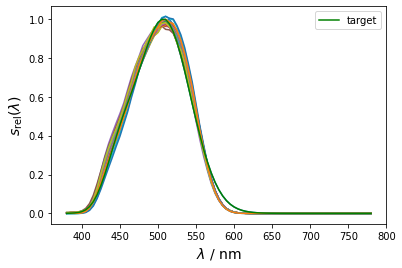

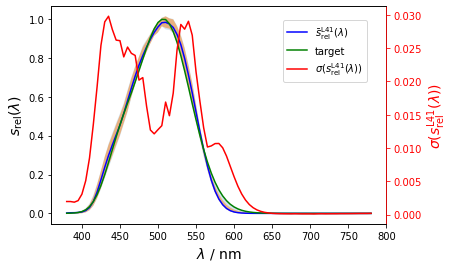

[7.9323e-11 6.6469e-02 6.4924e-02 7.0900e-02 9.6092e-02 8.8954e-02
 6.3658e-02 6.7268e-02 6.7839e-02 7.3677e-02 6.1266e-02 5.9708e-02
 6.2745e-02 6.1999e-02 6.0868e-02 5.8198e-02 6.4712e-02 6.6618e-02
 8.0780e-02 7.5088e-02 8.7120e-02 6.3243e-02]


In [22]:
_name = 'VS'
_detectors=_RES[_name+'Detectors']['S']['data'].copy()
_ , _ = display_responsivity(_name, _detectors, cieobs=_name, out_dir=out_dir)

SMEL


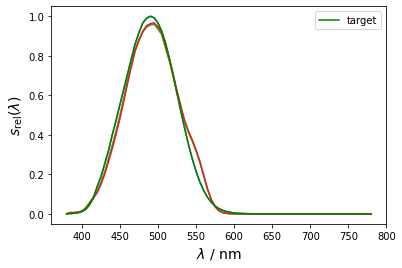

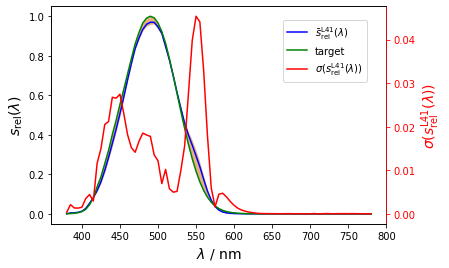

[1.0294e-05 8.3158e-02 8.9911e-02 9.4632e-02]
SMEL


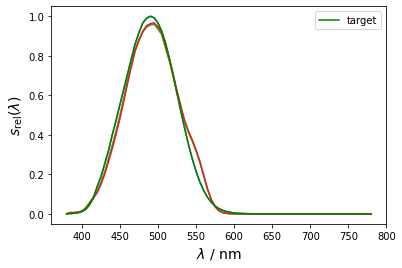

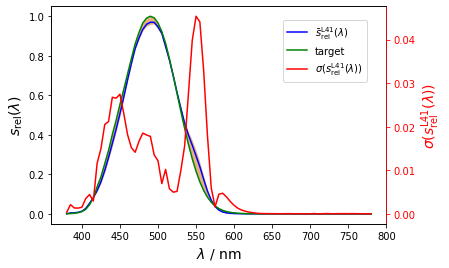

[1.0294e-05 8.3158e-02 8.9911e-02 9.4632e-02]


In [23]:
_name = 'SMEL'
_detectors=_RES[_name+'Detectors']['S']['data'].copy()
_, _ = display_responsivity(_name, _detectors, cieobs=_name, out_dir=out_dir)

# CMF data base

What is included here (including the new once)?
* Show name
* Plot

CMF data base:
1931_2


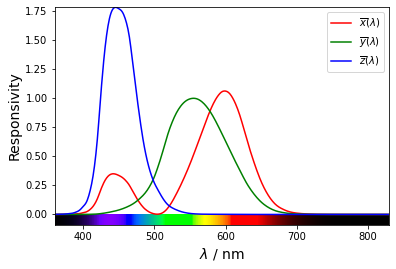

1964_10
2006_2
2006_10
2015_2
2015_10
1931_2_judd1951
1931_2_juddvos1978
1951_20_scotopic
cie_std_dev_obs_f1
BLH
SMEL
CMF data base:
1931_2


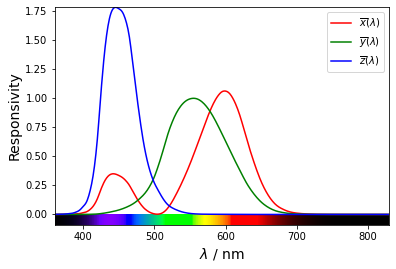

1964_10
2006_2
2006_10
2015_2
2015_10
1931_2_judd1951
1931_2_juddvos1978
1951_20_scotopic
cie_std_dev_obs_f1
BLH
SMEL


In [24]:
print('CMF data base:')
for cmf in _CMF['types']:
    print( cmf)
    if cmf == '1931_2':
        plot_cmf2()
        save_fig(out_dir, 'CMF_'+cmf)

# SPD data base

What is included here?
* Show name
* Plot selected SD
* plot the color values in a color diagram

SPD data base:
Name: BB 			 Size: 55
Name: PTLED 			 Size: 229
Name: CIES025_PTLED 			 Size: 228
Name: OSRAM_PTLED 			 Size: 137
Name: RGBLED 			 Size: 98
Name: CIES025_RGBLED 			 Size: 97
Name: PHOTOLED 			 Size: 1496
Name: TC2_90 			 Size: 1300
Name: MONOLED 			 Size: 638


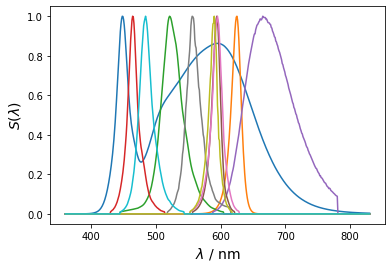

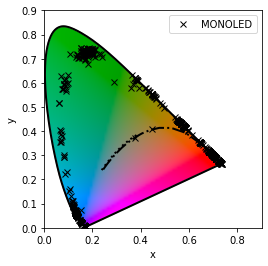

<Figure size 720x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

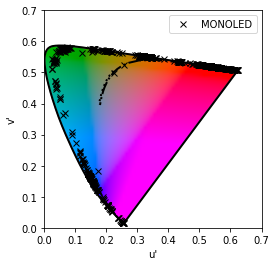

<Figure size 720x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Name: OSRAM_MONOLED 			 Size: 260
SPD data base:
Name: BB 			 Size: 55
Name: PTLED 			 Size: 229
Name: CIES025_PTLED 			 Size: 228
Name: OSRAM_PTLED 			 Size: 137
Name: RGBLED 			 Size: 98
Name: CIES025_RGBLED 			 Size: 97
Name: PHOTOLED 			 Size: 1496
Name: TC2_90 			 Size: 1300
Name: MONOLED 			 Size: 638


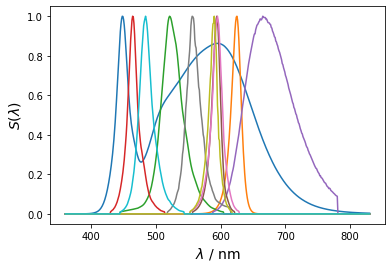

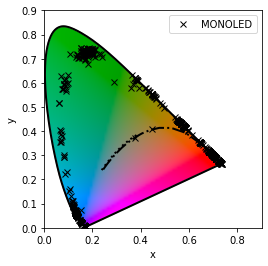

<Figure size 720x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

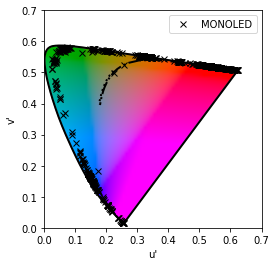

<Figure size 720x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Name: OSRAM_MONOLED 			 Size: 260


In [25]:
print('SPD data base:')
for spd, enable  in _SPD.items():
    print('Name:', spd, '\t\t\t', 'Size:', _SPD[spd]['S']['data'].shape[0]-1)
    _spectra=_SPD[spd]['S']['data'].copy()
    if spd == 'MONOLED':
        display_spectra( spd, _spectra, curvenumber=10)
        save_fig(out_dir, spd + '_spectra')

        display_color_diagram(spd, _spectra,cspace='Yxy')
        save_fig(out_dir, spd + '_xy')

        display_color_diagram(spd, _spectra,cspace='Yuv76')
        save_fig(out_dir, spd + '_uv76')

# Summary

In [26]:
import pandas as pd
tableResult = pd.DataFrame()
for cmf in _CMF['types']:
    df = pd.DataFrame( { 'Type': 'CMF', 'Name': cmf, 'Count': 1}, index=['CMF'])
    tableResult = pd.concat( [tableResult, df])
for spd, enable in _SPD.items():
    df = pd.DataFrame( { 'Type': 'SD', 'Name': spd, 'Count': _SPD[spd]['S']['data'].shape[0]-1}, index=['CMF'])
    tableResult = pd.concat( [tableResult, df])
for res, enable in _RES.items():
    df = pd.DataFrame( { 'Type': 'RES', 'Name': res, 'Count': _RES[res]['S']['data'].shape[0]-1}, index=['CMF'])
    tableResult = pd.concat( [tableResult, df])

print( tableResult)
tableResult.to_csv(out_dir + '/' + 'Overview.csv', index=False, sep=';', decimal=',', float_format='%.5f', mode='w')


    Type                 Name  Count
CMF  CMF               1931_2      1
CMF  CMF              1964_10      1
CMF  CMF               2006_2      1
CMF  CMF              2006_10      1
CMF  CMF               2015_2      1
CMF  CMF              2015_10      1
CMF  CMF      1931_2_judd1951      1
CMF  CMF   1931_2_juddvos1978      1
CMF  CMF     1951_20_scotopic      1
CMF  CMF   cie_std_dev_obs_f1      1
CMF  CMF                  BLH      1
CMF  CMF                 SMEL      1
CMF   SD                   BB     55
CMF   SD                PTLED    229
CMF   SD        CIES025_PTLED    228
CMF   SD          OSRAM_PTLED    137
CMF   SD               RGBLED     98
CMF   SD       CIES025_RGBLED     97
CMF   SD             PHOTOLED   1496
CMF   SD               TC2_90   1300
CMF   SD              MONOLED    638
CMF   SD        OSRAM_MONOLED    260
CMF  RES          VLDetectors    127
CMF  RES           XDetectors     27
CMF  RES           YDetectors     27
CMF  RES           ZDetectors     27
C